In [1]:
# basics
import numpy as np
import numexpr
import pandas as pd
import time
from datetime import datetime, date, timedelta
from dateutil import parser, tz
import re
import os
import sys
import pickle

from tqdm.notebook import trange, tqdm


#Math & ML
import sklearn.metrics
import math

# seaborn
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import plotly.express as px
import os, glob
sys.path.append("../")
import utils
from causalimpact import CausalImpact
from urllib.request import urlopen

In [2]:
mov_txt="movement-range-2020-09-25.txt"

In [3]:
os.getcwd()

'/Users/mk707t/repo_per/Covid19_fb/CA_Wildfire/Notebooks'

In [4]:
abs_path = os.getcwd()
data_path = '../Data/ETC/' # rel_path shouldn't start with slash. Otherwise will get recognized as abspath in os.path.join 

# Get the dataset: testing result, symptoms, policy


In [17]:
testing_result=glob.glob('{}/*.csv'.format(os.path.join(abs_path,data_path,"testing")))
symptoms_detailed= glob.glob('{}/*.csv'.format(os.path.join(abs_path,data_path,"symptoms")))
policy = glob.glob('{}/*.csv'.format(os.path.join(abs_path,data_path,"policies")))

In [18]:
print(testing_result)
print(symptoms_detailed)
print(policy)

['/Users/mk707t/repo_per/Covid19_fb/CA_Wildfire/Notebooks/../Data/ETC/testing/all-states-history.csv']
['/Users/mk707t/repo_per/Covid19_fb/CA_Wildfire/Notebooks/../Data/ETC/symptoms/09_sept_country_full_smoothed.csv', '/Users/mk707t/repo_per/Covid19_fb/CA_Wildfire/Notebooks/../Data/ETC/symptoms/08_august_country_full_smoothed.csv', '/Users/mk707t/repo_per/Covid19_fb/CA_Wildfire/Notebooks/../Data/ETC/symptoms/07_july_country_full_smoothed.csv', '/Users/mk707t/repo_per/Covid19_fb/CA_Wildfire/Notebooks/../Data/ETC/symptoms/04_april_country_full_smoothed.csv', '/Users/mk707t/repo_per/Covid19_fb/CA_Wildfire/Notebooks/../Data/ETC/symptoms/06_june_country_full_smoothed.csv', '/Users/mk707t/repo_per/Covid19_fb/CA_Wildfire/Notebooks/../Data/ETC/symptoms/05_may_country_full_smoothed.csv']
['/Users/mk707t/repo_per/Covid19_fb/CA_Wildfire/Notebooks/../Data/ETC/policies/nyt-states-reopen-status-covid-19_dataset_nyt-states-reopen-status-covid-19.csv']


In [19]:
def open_files(file_list):
    df_combined = pd.DataFrame()
    
    for f in file_list:
        df_ = pd.read_csv(f)
        df_combined = pd.concat([df_combined,df_])
    return df_combined

In [20]:
testing_df = open_files(testing_result)
display(testing_df)    

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-09-28,WY,B,50.0,NaN,0,NaN,264.0,264.0,22.0,...,100116.0,2077,NaN,NaN,NaN,NaN,99259.0,2268,159210.0,4128
1,2020-09-28,NE,A,470.0,NaN,1,NaN,2280.0,2280.0,224.0,...,448361.0,3232,NaN,NaN,NaN,NaN,448666.0,3232,606842.0,5306
2,2020-09-28,ND,B,177.0,174.0,21,3.0,828.0,828.0,105.0,...,603922.0,3855,9357.0,NaN,NaN,NaN,238737.0,1119,626289.0,3981
3,2020-09-28,NC,A+,3445.0,3418.0,4,27.0,NaN,NaN,897.0,...,3004533.0,25805,NaN,NaN,NaN,NaN,NaN,0,2999853.0,25801
4,2020-09-28,MT,C,174.0,NaN,1,NaN,698.0,698.0,158.0,...,337196.0,6889,NaN,NaN,NaN,NaN,NaN,0,337196.0,6889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11685,2020-01-24,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
11686,2020-01-23,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
11687,2020-01-23,MA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,2.0,1,NaN,NaN,NaN,NaN,NaN,0,2.0,1
11688,2020-01-22,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [21]:
symptoms_df = open_files(symptoms_detailed)
display(symptoms_df)   

,Unnamed: 0,country_agg,GID_0,gender,age_bucket,date,rolling_total_responses,weight_sums,smoothed_pct_cli,smoothed_pct_ili,...,smoothed_pct_enough_toEat_very_worried_weighted,smoothed_pct_enough_toEat_somewhat_worried_weighted,smoothed_pct_enough_toEat_notToo_worried_weighted,smoothed_pct_enough_toEat_not_worried_weighted,smoothed_pct_finances_very_worried_weighted,smoothed_pct_finances_somewhat_worried_weighted,smoothed_pct_finances_notToo_worried_weighted,smoothed_pct_finances_not_worried_weighted,smoothed_pct_wear_mask_all_time,smoothed_pct_wear_mask_all_time_weighted
0,0,Afghanistan,AFG,female,overall,2020-09-07,55.0,121076.20,10.18,8.36,...,15.82,8.79,26.76,44.84,28.42,15.10,28.97,22.11,NaN,NaN
1,1,Afghanistan,AFG,female,overall,2020-09-08,60.0,542536.12,14.33,12.67,...,16.15,19.60,19.03,41.75,37.26,7.98,26.76,23.04,NaN,NaN
2,2,Afghanistan,AFG,female,overall,2020-09-09,54.0,288516.28,13.15,11.30,...,16.64,18.48,18.71,42.32,33.24,8.45,23.85,25.54,NaN,NaN
3,3,Afghanistan,AFG,male,18-34,2020-09-07,318.0,2417528.51,10.62,8.89,...,13.60,18.04,25.97,38.08,29.46,26.20,17.67,25.79,NaN,NaN
4,4,Afghanistan,AFG,male,18-34,2020-09-08,296.0,1816813.25,10.25,8.77,...,13.19,19.36,27.81,37.28,30.69,26.51,18.09,24.23,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45235,18461,Yemen,YEM,overall,overall,2020-05-03,645.0,5776111.11,3.62,3.44,...,14.80,22.07,16.80,37.84,NaN,NaN,NaN,NaN,NaN,NaN
45236,18462,Yemen,YEM,overall,overall,2020-05-04,676.0,6055485.54,3.99,3.66,...,17.75,24.18,15.78,33.88,NaN,NaN,NaN,NaN,NaN,NaN
45237,18463,Yemen,YEM,overall,overall,2020-05-05,699.0,7053058.81,4.18,3.86,...,18.09,25.38,16.24,32.22,NaN,NaN,NaN,NaN,NaN,NaN
45238,18464,Yemen,YEM,overall,overall,2020-05-06,714.0,5236070.26,4.69,4.37,...,18.94,25.21,17.21,29.41,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
policy_df = open_files(policy)
display(policy_df)  

,state_abbreviation,state,status,date_details,restriction_start,restriction_end,status_details,external_link,closed_outdoor_and_recreation,opened_personal_care,opened_retail,opened_food_and_drink,opened_houses_of_worship,closed_food_and_drink,closed_entertainment,opened_industries,opened_entertainment,opened_outdoor_and_recreation,population
0,AK,Alaska,reopened,Reopened April 24.,NaN,NaN,"Gov. Mike Dunleavy, a Republican, eased restri...",https://www.alaskapublic.org/2020/08/11/6-thin...,NaN,"Hair salons, barbershops, nail salons, etc.",Retail stores,Restaurant dining; Bars,True,NaN,NaN,NaN,Libraries; Theaters; Bowling alleys; Museums,Gyms; Pools,731545
1,AL,Alabama,pausing,Reopened April 30.,NaN,NaN,"Gov. Kay Ivey, a Republican, ordered residents...",https://www.wbrc.com/2020/08/27/gov-ivey-hold-...,NaN,Salons,Retail stores,"Restaurant dining, bars and breweries",True,NaN,NaN,NaN,Entertainment venues,Beaches; Gyms,4903185
2,AR,Arkansas,pausing,Reopened May 6.,NaN,NaN,"Gov. Asa Hutchinson, a Republican, never imple...",https://www.kspr.com/content/news/Arkansas-gov...,NaN,"Hair salons, barbershops, nail salons, etc.",Retail,Restaurant dining; Bars,True,NaN,NaN,NaN,"Theaters, stadiums, museums, bowling alleys; C...",Campgrounds; Gyms; Pools,3017804
3,AZ,Arizona,reversing,Reopened May 8.,NaN,NaN,After Gov. Doug Ducey’s stay-at-home order exp...,https://www.fox10phoenix.com/news/arizona-gov-...,Gyms; Waterparks,"Barbershops, salons, etc.",Retail stores,Restaurant dining,True,Bars,Movie theaters,NaN,Casinos,"Pools, spas",7278717
4,CA,California,reversing,Reopened May 25.,NaN,NaN,"Gov. Gavin Newsom, a Democrat, emphasized caut...",https://www.latimes.com/projects/california-co...,NaN,"Pet groomers; Nail salons, cosmetology service...",Retail,Outdoor dining,Houses of worship in some counties,Bars,"Movie theaters; Museums, galleries, and aquari...",Manufacturing; Warehouses; Offices in some cou...,Casinos in some areas; Zoos in some counties,Gyms in some counties,39512223
5,CO,Colorado,reversing,Reopened April 27.,NaN,NaN,Gov. Jared Polis was one of the first Democrat...,https://denver.cbslocal.com/2020/06/30/polis-c...,NaN,Salons and personal services,Retail stores,Restaurant dining; Bars in some counties,True,NaN,NaN,Offices; Manufacturing,"Museums, indoor events; Fairs, rodeos, concert...","Campgrounds; Pools, playgrounds; Gyms",5758736
6,CT,Connecticut,pausing,Reopened May 20.,NaN,NaN,Connecticut was one of the last states to begi...,https://www.nbcconnecticut.com/news/local/here...,NaN,"Hair salons, barbershops; Nail salons; Tattoo ...","Retail stores, malls",Restaurant dining,True,Bars,NaN,Offices,"Museums, zoos; Casinos; Movie theaters; Librar...",Beaches; Gyms; State campgrounds,3565287
7,DC,District of Columbia,reopening,Reopened May 29.,NaN,NaN,"Washington, D.C., was under one of the nation’...",https://dcist.com/story/20/07/29/d-c-just-made...,NaN,"Barbershops, hair salons; Nail salons, waxing ...",Retail stores,Restaurants dining,True,NaN,Nightclubs,NaN,"Museums, libraries","Dog parks, golf courses, tennis courts, parks;...",705749
8,DE,Delaware,pausing,Reopened June 1.,NaN,NaN,"Gov. John Carney, a Democrat, has overseen one...",https://www.delawareonline.com/story/news/coro...,NaN,"Barber shops, hair salons, tanning salons; Nai...",Retail stores; Malls,Farmers markets; Restaurants; Bars in some areas,True,NaN,NaN,NaN,"Museums, libraries, galleries, live performanc...",Beaches; Pools; Gyms; Campgrounds,973764
9,FL,Florida,reopened,Reopened May 4.,NaN,NaN,After reopenings in May and June led to outbre...,https://www.tampabay.com/news/florida-politics...,NaN,"Salons; Tattoo parlors, massage therapy, tanni...",Retail stores,Restaurant dining; Bars,True,NaN,NaN,NaN,"Museums, libraries; Movie theaters, concert ha...","Beaches, trails; Gyms",21477737


# Clustering symptoms by geography 


In [28]:
symptoms_df = symptoms_df.drop(columns="Unnamed: 0")

In [31]:
symptoms_df.head()

,country_agg,GID_0,gender,age_bucket,date,rolling_total_responses,weight_sums,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_fever,...,smoothed_pct_enough_toEat_very_worried_weighted,smoothed_pct_enough_toEat_somewhat_worried_weighted,smoothed_pct_enough_toEat_notToo_worried_weighted,smoothed_pct_enough_toEat_not_worried_weighted,smoothed_pct_finances_very_worried_weighted,smoothed_pct_finances_somewhat_worried_weighted,smoothed_pct_finances_notToo_worried_weighted,smoothed_pct_finances_not_worried_weighted,smoothed_pct_wear_mask_all_time,smoothed_pct_wear_mask_all_time_weighted
0,Afghanistan,AFG,female,overall,2020-09-07,55.0,121076.20,10.18,8.36,12.18,...,15.82,8.79,26.76,44.84,28.42,15.10,28.97,22.11,NaN,NaN
1,Afghanistan,AFG,female,overall,2020-09-08,60.0,542536.12,14.33,12.67,16.17,...,16.15,19.60,19.03,41.75,37.26,7.98,26.76,23.04,NaN,NaN
2,Afghanistan,AFG,female,overall,2020-09-09,54.0,288516.28,13.15,11.30,15.19,...,16.64,18.48,18.71,42.32,33.24,8.45,23.85,25.54,NaN,NaN
3,Afghanistan,AFG,male,18-34,2020-09-07,318.0,2417528.51,10.62,8.89,12.77,...,13.60,18.04,25.97,38.08,29.46,26.20,17.67,25.79,NaN,NaN
4,Afghanistan,AFG,male,18-34,2020-09-08,296.0,1816813.25,10.25,8.77,12.54,...,13.19,19.36,27.81,37.28,30.69,26.51,18.09,24.23,NaN,NaN


In [52]:
[cl for cl in symptoms_df.columns if 'pct_contact' in cl]

[]

In [34]:
symptoms_df.country_agg.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia',
       'Czech Republic', "Côte d'Ivoire",
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Ethiopia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary',
       'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan',
       'Laos', 'Lebanon', 'Libya', 'Madagascar', 'Malaysia', 'Mali',
       'Mauritania', 'Mexico', 'Moldova', 'Morocco', 'Mozambique',
       'Myanmar', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua',
     

In [37]:
# countries in Afria continent
AF = ['Algeria', 'Angola',  'Benin',  'Bosnia and Herzegovina',
        'Burkina Faso', 'Cameroon', "Côte d'Ivoire",
       'Democratic Republic of the Congo', 
       'Ethiopia',  'Ghana', 'Guinea', 'Libya', 'Madagascar',  'Mali',
       'Mauritania', 'Morocco', 'Mozambique', 'Nigeria',
       'Senegal',  'Sudan', 'Tanzania',  'Tunisia', 'Andorra', 'Zimbabwe',
      'Uganda', 'South Sudan', 'Botswana', 'Central African Republic','Western Sahara']

# South America
SA= ['Chile','Paraguay', 'Peru', 'Uruguay', 'Argentina',  'Antigua']

# Central america 
CA= ['Mexico',  'Nicaragua','Guatemala', 'Colombia',
     'Venezuela', 'Costa Rica','El Salvador', 'Honduras'] 

# Carribean
CRB =['Dominican Republic', 'Panama', 'Puerto Rico, U.S.', 'Dominica', 'Antigua']

# South east asia 
SEAS=['Bangladesh','Cambodia','India', 'Indonesia', 
       'Laos', 'Malaysia', 'Myanmar', 'Nepal', 'Pakistan',
      'Philippines',  'Sri Lanka', 'Thailand','Vietnam' ]

# North east asia 
NEAS=['Hong Kong', 'Japan',  'Singapore',  'South Korea',  'Taiwan',  'Macau']
# Central asia 
CAS=['Armenia', 'Azerbaijan','Kazakhstan','Kyrgyzstan',
      'Russia', 'Turkey', 'Ukraine', 'Uzbekistan' ]
# Middle east 
MES=['Afghanistan',  'Iraq', 'Israel', 'Palestine', 'Jordan',  'Kuwait',  'Lebanon', 'Oman', 'Qatar', 
      'United Arab Emirates','Yemen', 'Bahrain']
# Europe 
EU=[ 'Albania',  'Bulgaria', 'Austria', 'Belgium', 'Croatia','Czech Republic', 
    'Denmark','Finland', 'France', 'Germany', 'Greece',
        'Hungary','Italy', 'Netherlands','Norway', 'Poland', 'Portugal',
        'Romania',  'Slovakia', 'Slovenia','Spain', 
       'Sweden', 'Switzerland', 'Cyprus', 'Luxembourg']

In [38]:
filt_AF = symptoms_df.country_agg.isin(AF)
filt_SA = symptoms_df.country_agg.isin(SA)
filt_CA = symptoms_df.country_agg.isin(CA)
filt_CRB = symptoms_df.country_agg.isin(CRB)
filt_SEAS = symptoms_df.country_agg.isin(SEAS)
filt_NEAS = symptoms_df.country_agg.isin(NEAS)
filt_CAS = symptoms_df.country_agg.isin(CAS)
filt_MES = symptoms_df.country_agg.isin(MES)
filt_EU = symptoms_df.country_agg.isin(EU)

symptoms_df.loc[filt_AF,'region']= 'Africa'
symptoms_df.loc[filt_SA,'region']= 'South America'
symptoms_df.loc[filt_CA,'region']= 'Central America'
symptoms_df.loc[filt_CRB,'region']= 'Carribean'
symptoms_df.loc[filt_SEAS,'region']= 'South East Asia'
symptoms_df.loc[filt_NEAS,'region']= 'North East Asia'
symptoms_df.loc[filt_CAS,'region']= 'Central Asia'
symptoms_df.loc[filt_MES,'region']= 'Middle East'
symptoms_df.loc[filt_EU,'region']= 'EU'


In [41]:
symptoms_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193122 entries, 0 to 45239
Columns: 116 entries, country_agg to region
dtypes: float64(110), object(6)
memory usage: 172.4+ MB


,rolling_total_responses,weight_sums,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_fever,smoothed_pct_cough,smoothed_pct_difficulty_breathing,smoothed_pct_fatigue,smoothed_pct_stuffy_runny_nose,smoothed_pct_aches_muscle_pain,...,smoothed_pct_enough_toEat_very_worried_weighted,smoothed_pct_enough_toEat_somewhat_worried_weighted,smoothed_pct_enough_toEat_notToo_worried_weighted,smoothed_pct_enough_toEat_not_worried_weighted,smoothed_pct_finances_very_worried_weighted,smoothed_pct_finances_somewhat_worried_weighted,smoothed_pct_finances_notToo_worried_weighted,smoothed_pct_finances_not_worried_weighted,smoothed_pct_wear_mask_all_time,smoothed_pct_wear_mask_all_time_weighted
rolling_total_responses,1.000000,0.776772,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
weight_sums,0.776772,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
smoothed_pct_cli,0.000000,0.000000,1.000000,0.968034,0.836665,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
smoothed_pct_ili,0.000000,0.000000,0.968034,1.000000,0.822931,0.0,0.711278,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
smoothed_pct_fever,0.000000,0.000000,0.836665,0.822931,1.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
smoothed_pct_finances_somewhat_worried_weighted,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.821972,0.741756,0.000000,0.000000
smoothed_pct_finances_notToo_worried_weighted,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.821972,1.000000,0.745828,0.000000,0.000000
smoothed_pct_finances_not_worried_weighted,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.741756,0.745828,1.000000,0.000000,0.000000
smoothed_pct_wear_mask_all_time,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.988984


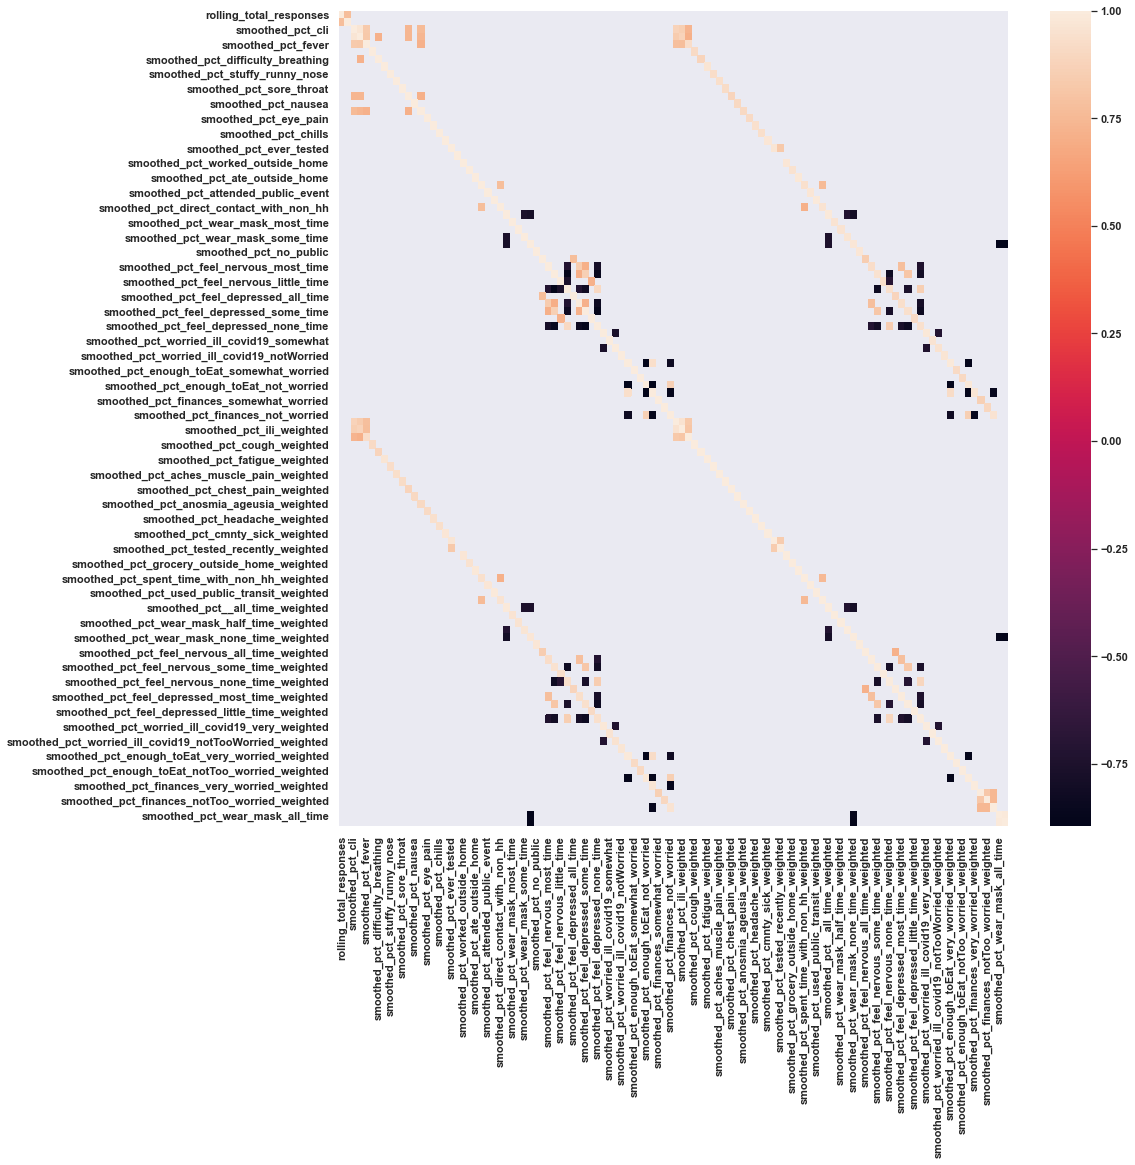

In [71]:
# calculate the correlation matrix
corr = symptoms_df[symptoms_df['region']=='Africa'].corr()
f, ax = plt.subplots(figsize=(15,15))

# plot the heatmap
sns.heatmap(corr[(corr> 0.7)| (corr<-0.7) ])
display(corr[(corr> 0.7)| (corr<-0.7) ].fillna(0))

,rolling_total_responses,weight_sums,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_fever,smoothed_pct_cough,smoothed_pct_difficulty_breathing,smoothed_pct_fatigue,smoothed_pct_stuffy_runny_nose,smoothed_pct_aches_muscle_pain,...,smoothed_pct_enough_toEat_very_worried_weighted,smoothed_pct_enough_toEat_somewhat_worried_weighted,smoothed_pct_enough_toEat_notToo_worried_weighted,smoothed_pct_enough_toEat_not_worried_weighted,smoothed_pct_finances_very_worried_weighted,smoothed_pct_finances_somewhat_worried_weighted,smoothed_pct_finances_notToo_worried_weighted,smoothed_pct_finances_not_worried_weighted,smoothed_pct_wear_mask_all_time,smoothed_pct_wear_mask_all_time_weighted
rolling_total_responses,1.000000,0.920537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
weight_sums,0.920537,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
smoothed_pct_cli,0.000000,0.000000,1.000000,0.986229,0.979533,0.803423,0.844398,0.751896,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
smoothed_pct_ili,0.000000,0.000000,0.986229,1.000000,0.970464,0.793949,0.848487,0.734895,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
smoothed_pct_fever,0.000000,0.000000,0.979533,0.970464,1.000000,0.822800,0.855452,0.772360,0.70763,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
smoothed_pct_finances_somewhat_worried_weighted,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.80849,1.000000,0.887103,0.000000,0.000000,0.000000
smoothed_pct_finances_notToo_worried_weighted,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.887103,1.000000,0.814813,0.000000,0.000000
smoothed_pct_finances_not_worried_weighted,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.814813,1.000000,0.000000,0.000000
smoothed_pct_wear_mask_all_time,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,1.000000,0.985934


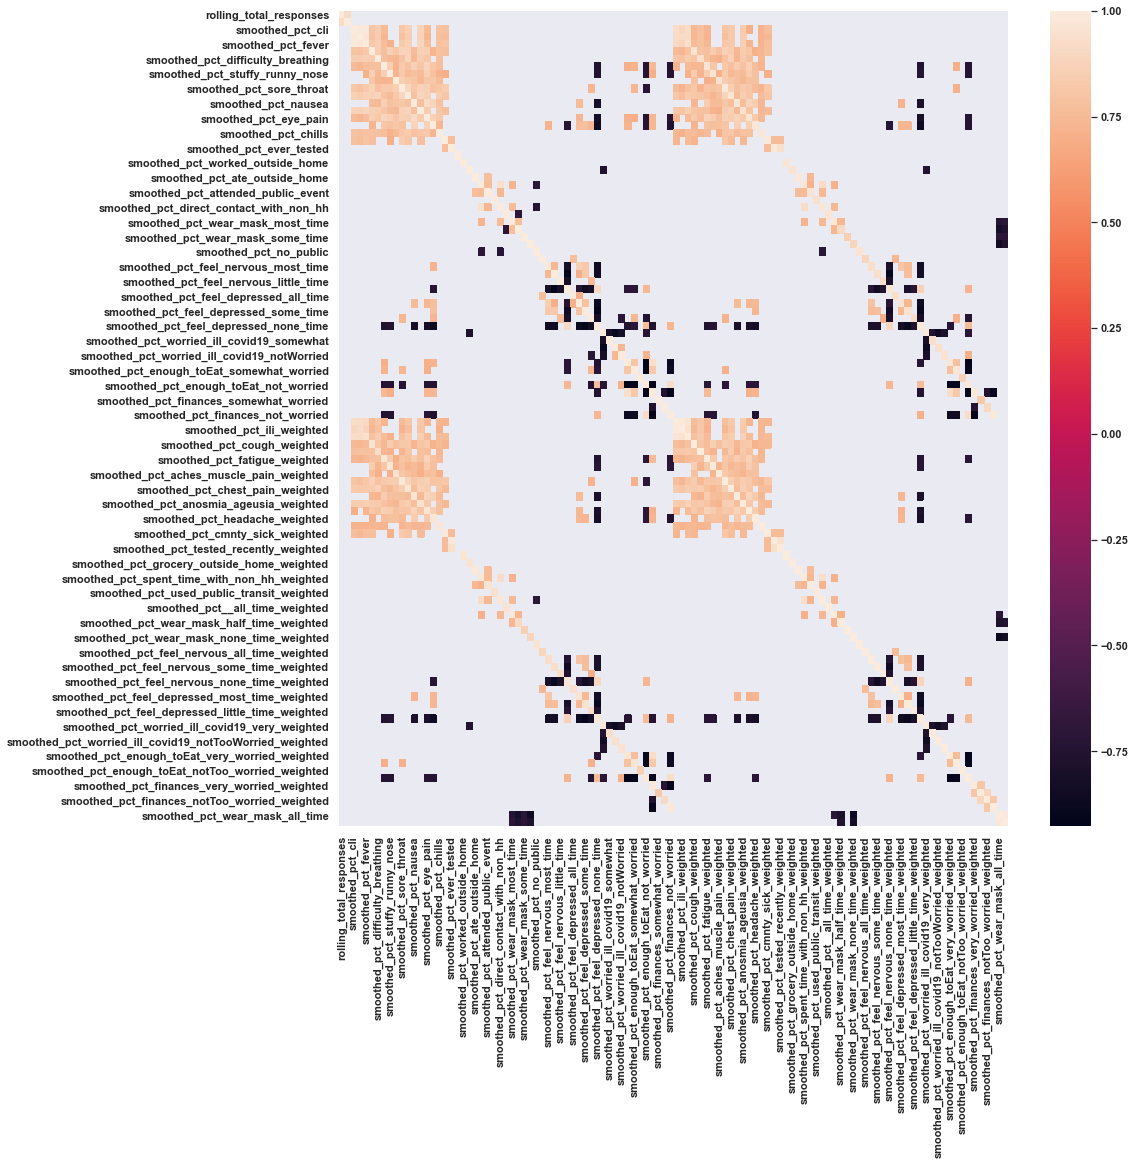

In [72]:
# calculate the correlation matrix
corr = symptoms_df[symptoms_df['region']=='South America'].corr()
f, ax = plt.subplots(figsize=(15,15))

# plot the heatmap
sns.heatmap(corr[(corr> 0.7)| (corr<-0.7) ])
display(corr[(corr> 0.7)| (corr<-0.7) ].fillna(0))

<AxesSubplot:>

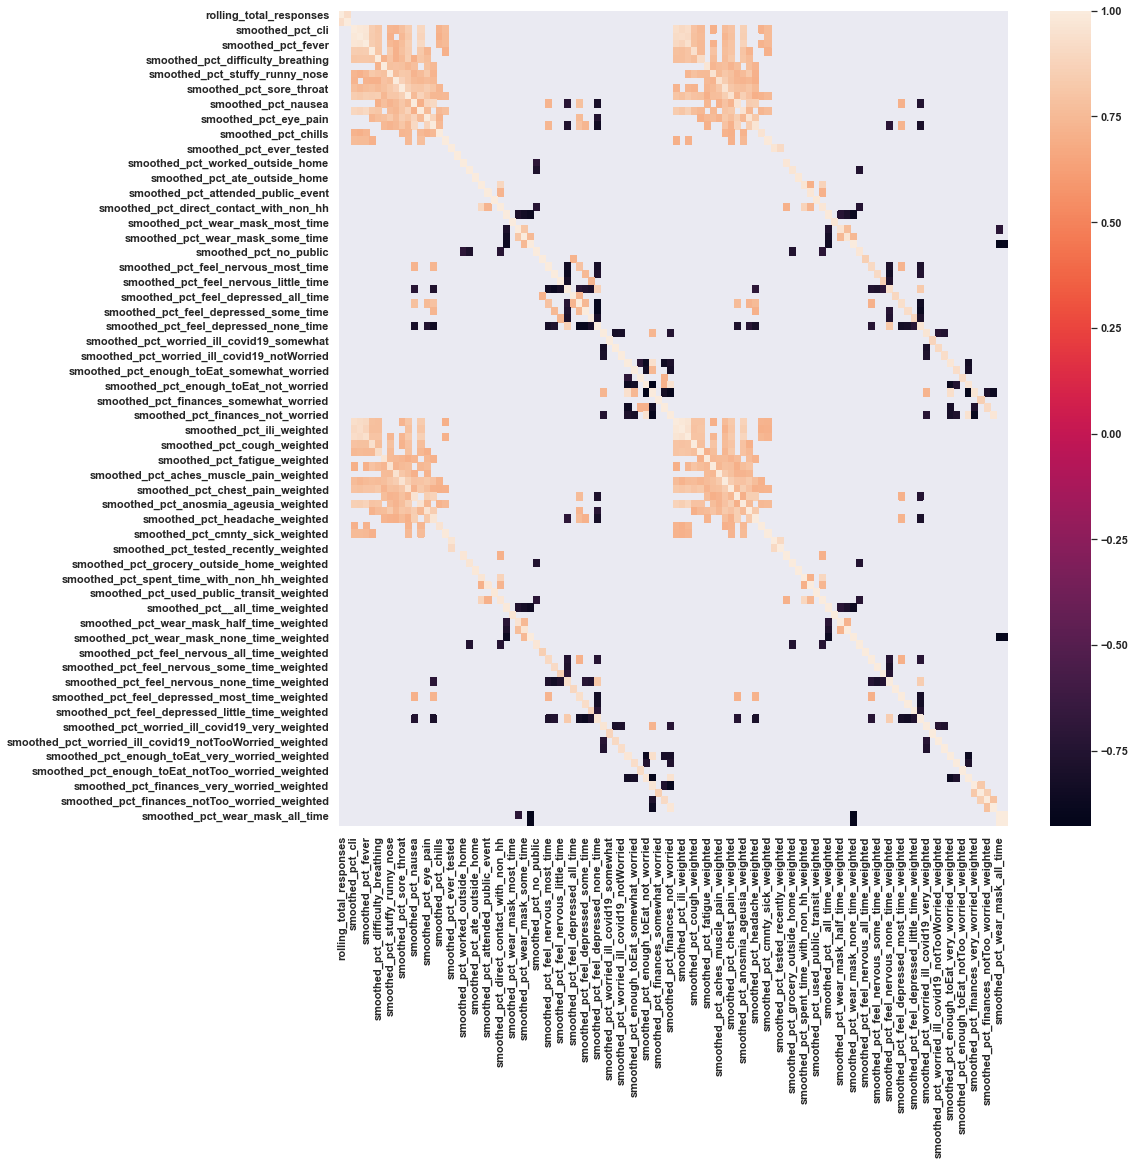

In [78]:
# calculate the correlation matrix
corr = symptoms_df[symptoms_df['region']=='Central America'].corr()
f, ax = plt.subplots(figsize=(15, 15))

# plot the heatmap
sns.heatmap(corr[(corr> 0.7)| (corr<-0.7) ])

<AxesSubplot:>

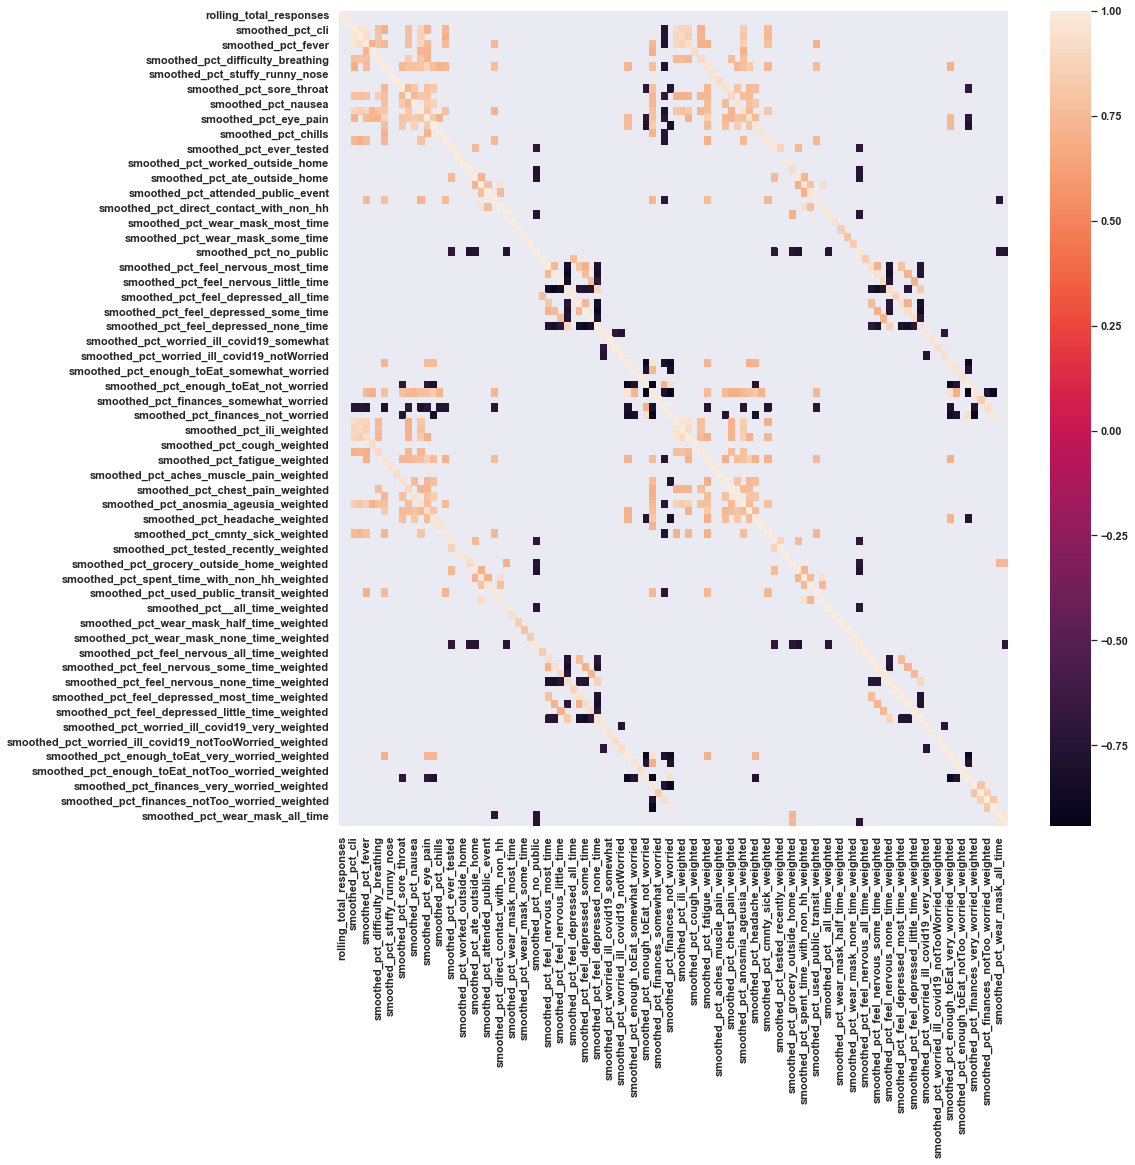

In [73]:
# calculate the correlation matrix
corr = symptoms_df[symptoms_df['region']=='Carribean'].corr()
f, ax = plt.subplots(figsize=(15,15))

# plot the heatmap
sns.heatmap(corr[(corr> 0.7)| (corr<-0.7) ])

<AxesSubplot:>

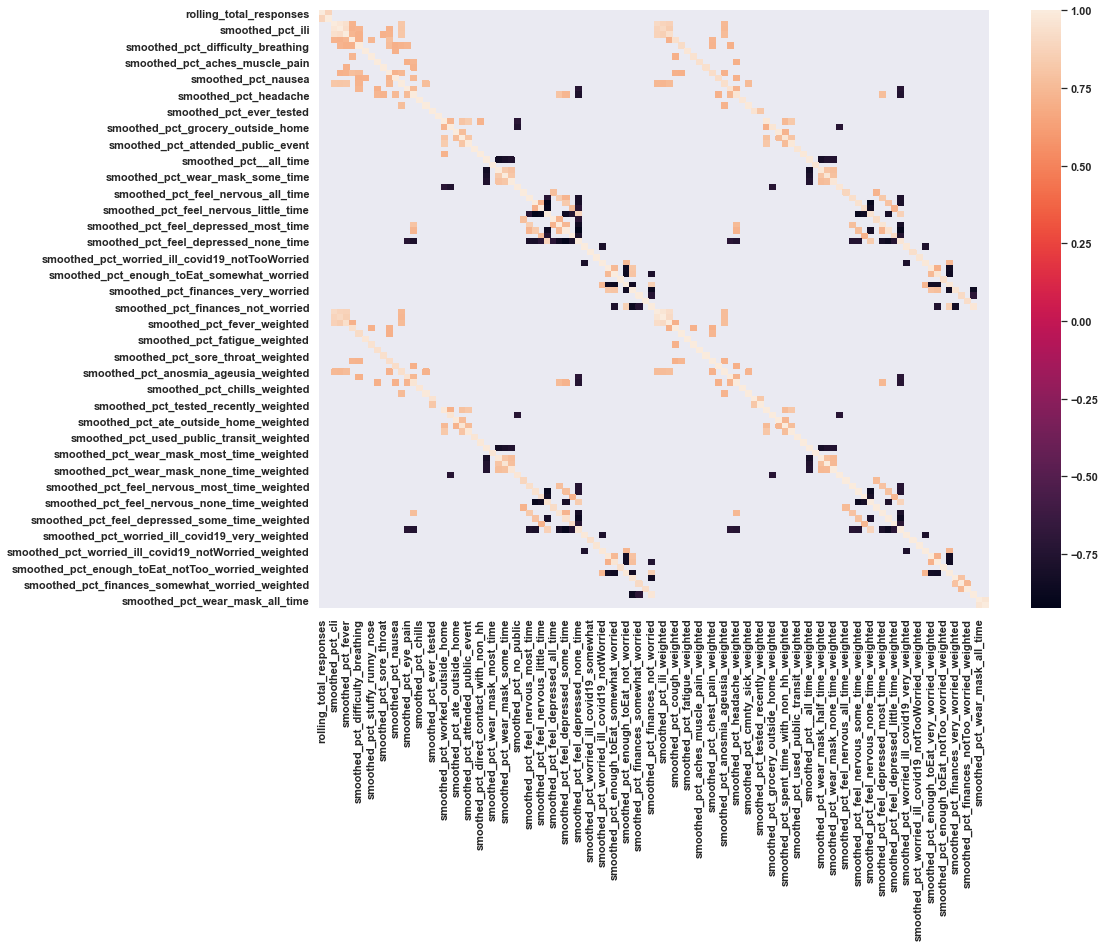

In [63]:
# calculate the correlation matrix
corr = symptoms_df[symptoms_df['region']=='South East Asia'].corr()
f, ax = plt.subplots(figsize=(15, 11))

# plot the heatmap
sns.heatmap(corr[(corr> 0.7)| (corr<-0.7) ])

<AxesSubplot:>

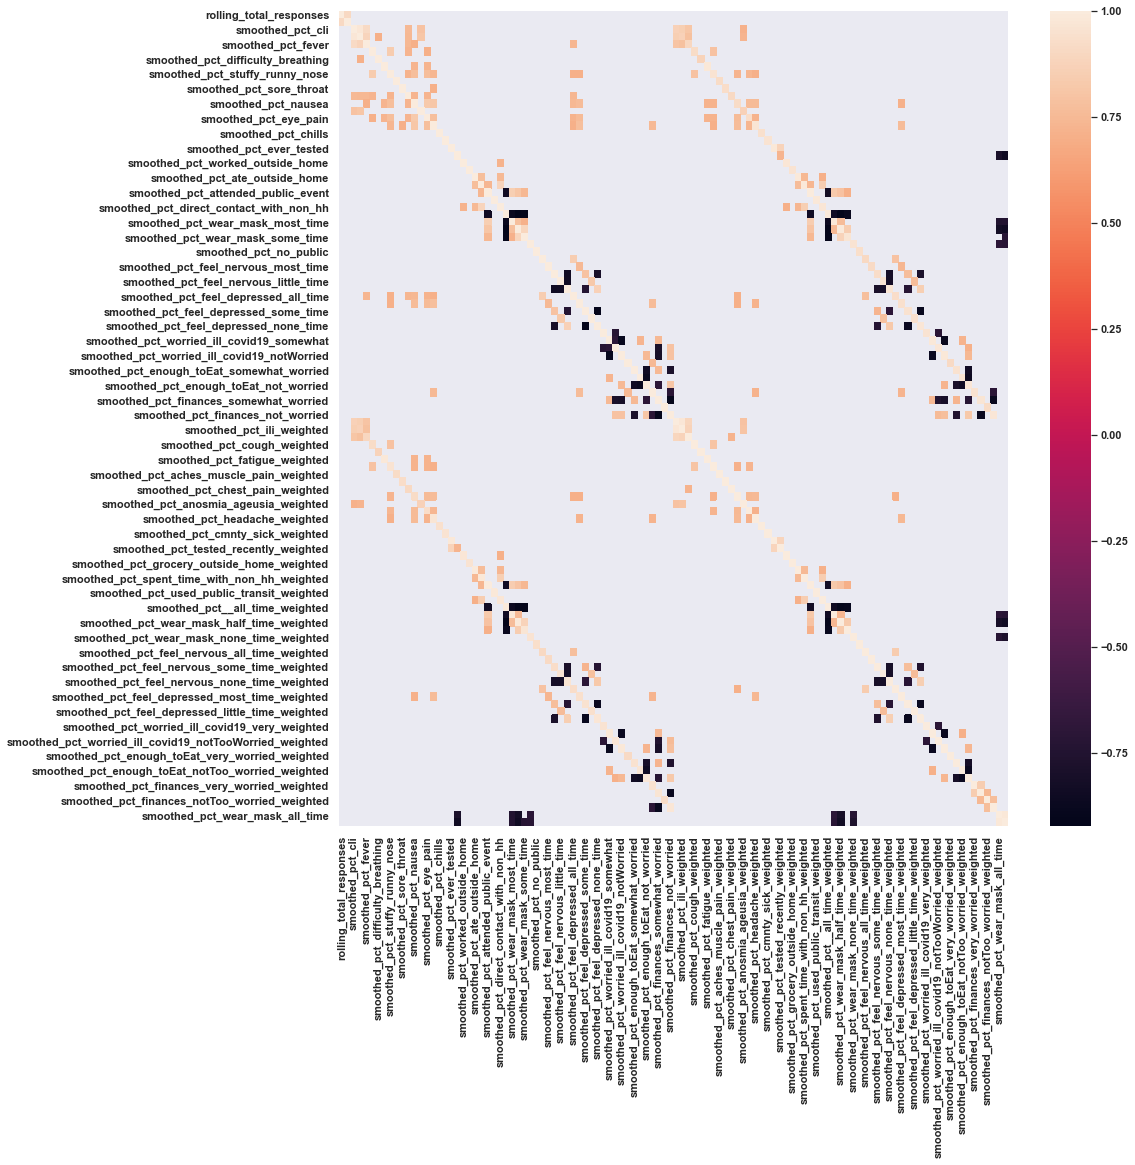

In [74]:
# calculate the correlation matrix
corr = symptoms_df[symptoms_df['region']=='North East Asia'].corr()
f, ax = plt.subplots(figsize=(15,15))

# plot the heatmap
sns.heatmap(corr[(corr> 0.7)| (corr<-0.7) ])

<AxesSubplot:>

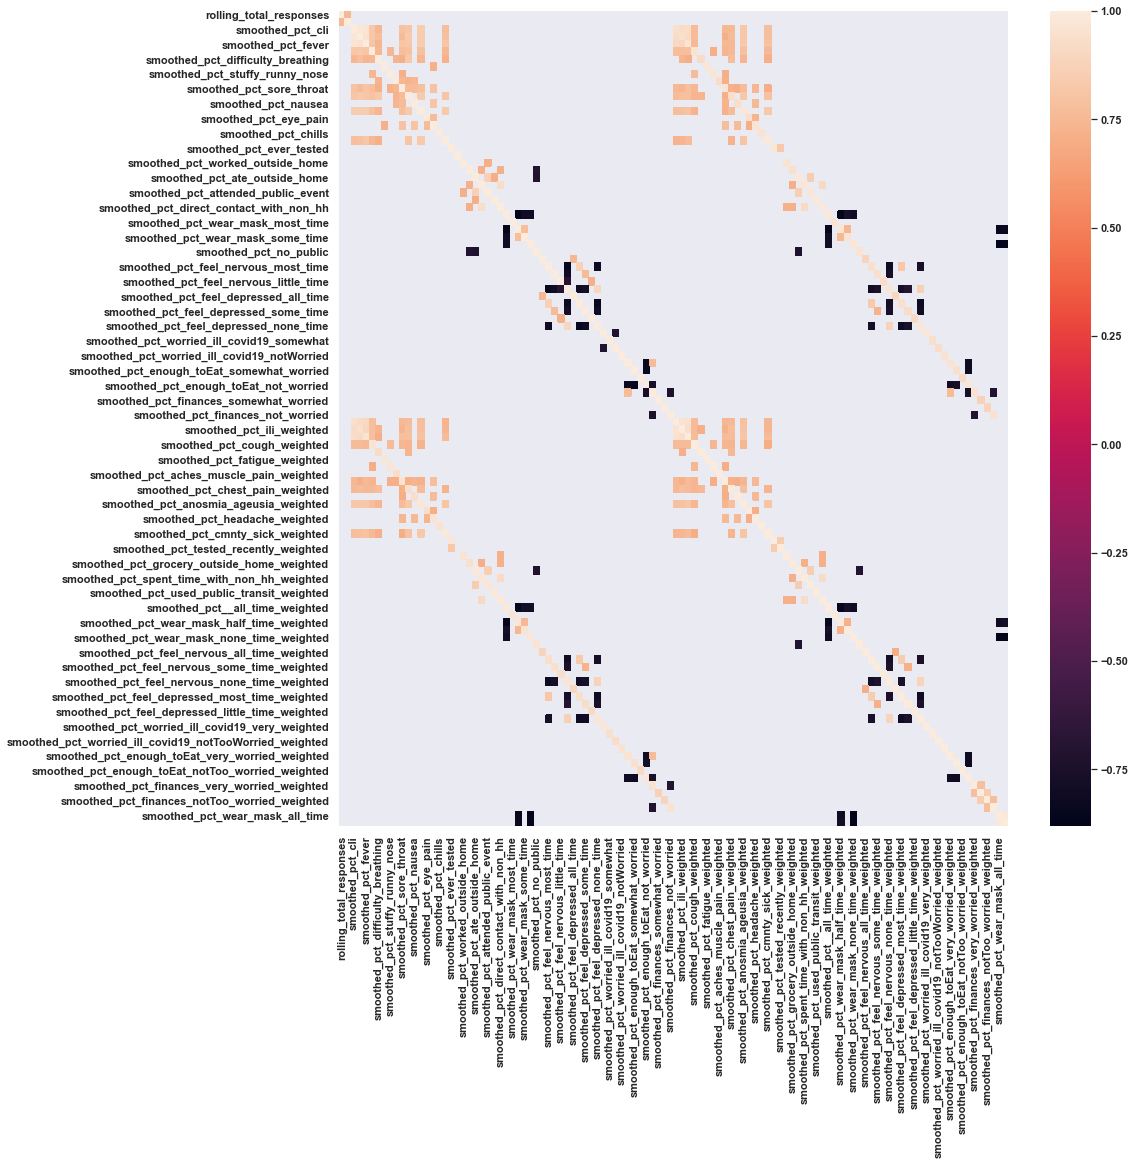

In [75]:
# calculate the correlation matrix
corr = symptoms_df[symptoms_df['region']=='Central Asia'].corr()
f, ax = plt.subplots(figsize=(15,15))

# plot the heatmap
sns.heatmap(corr[(corr> 0.7)| (corr<-0.7) ])

<AxesSubplot:>

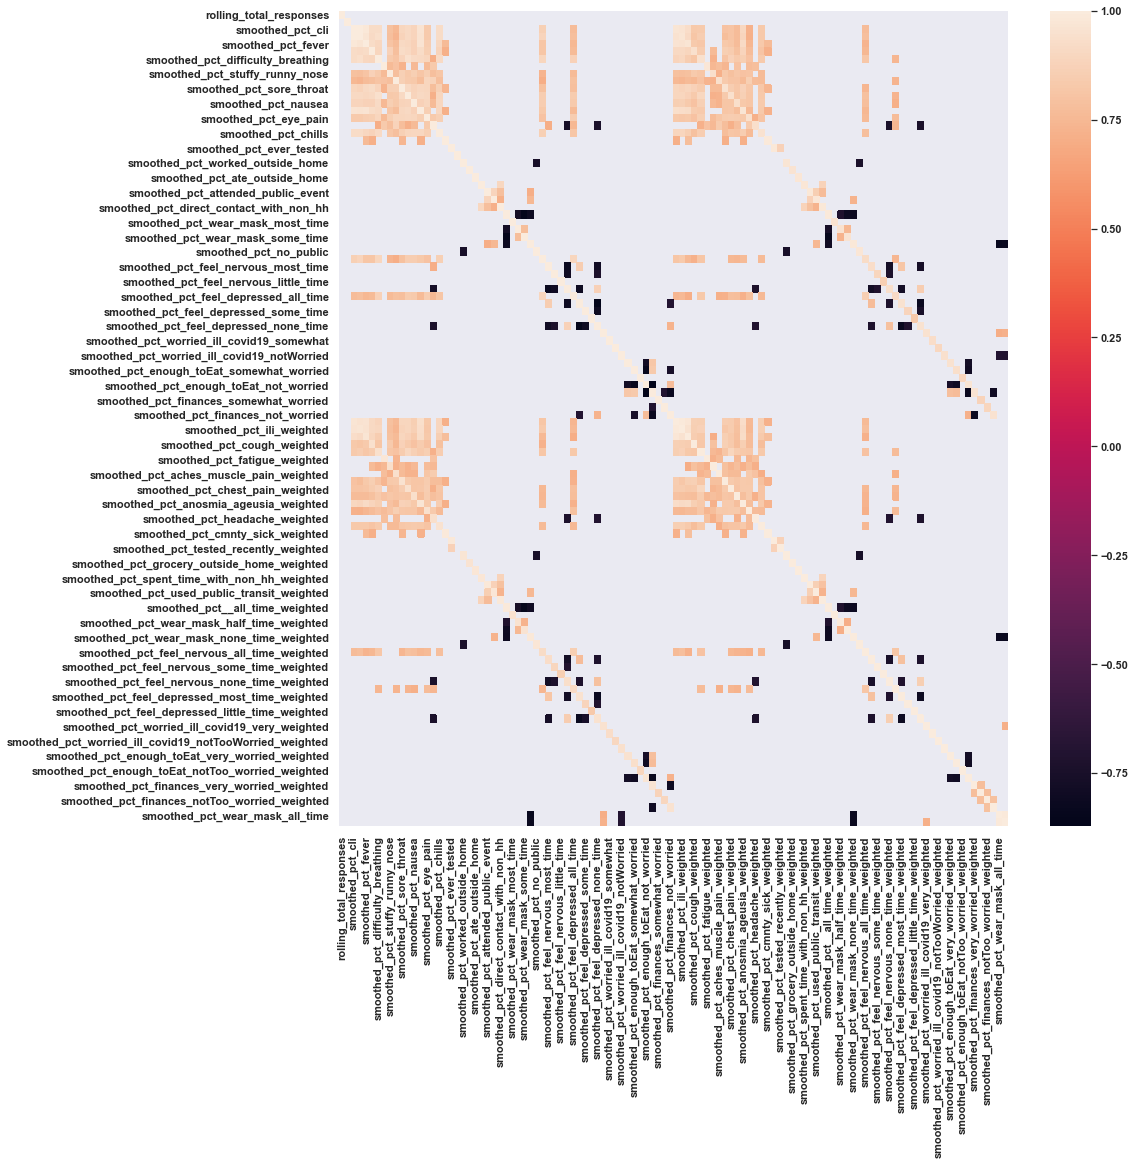

In [77]:
# calculate the correlation matrix
corr = symptoms_df[symptoms_df['region']=='Middle East'].corr()
f, ax = plt.subplots(figsize=(15, 15))

# plot the heatmap
sns.heatmap(corr[(corr> 0.7)| (corr<-0.7) ])

<AxesSubplot:>

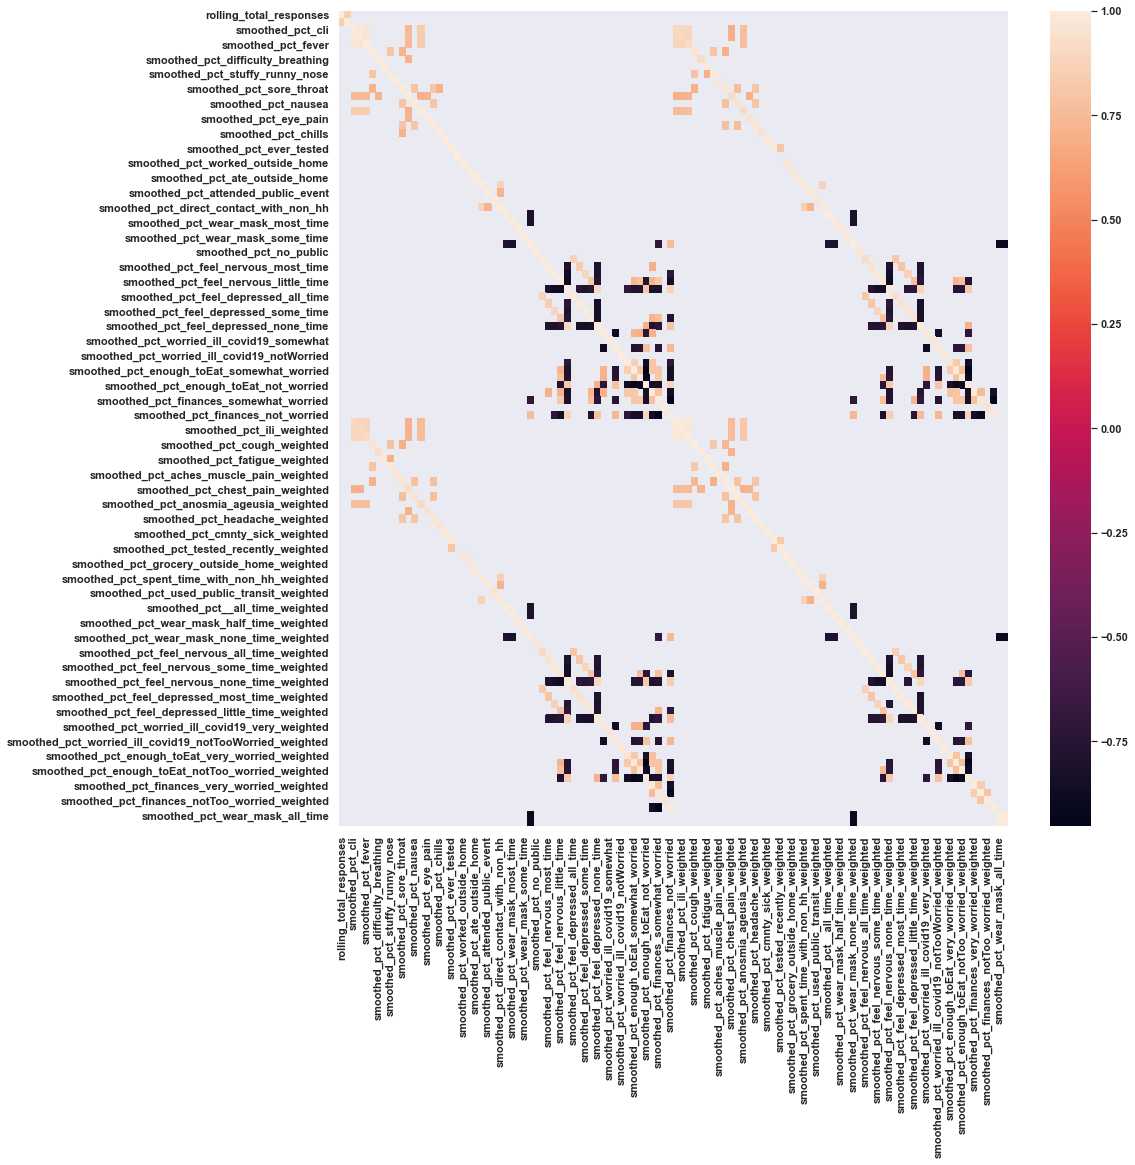

In [76]:
# calculate the correlation matrix
corr = symptoms_df[symptoms_df['region']=='EU'].corr()
f, ax = plt.subplots(figsize=(15,15))

# plot the heatmap
sns.heatmap(corr[(corr> 0.7)| (corr<-0.7) ])

In [79]:
## These likely have an implications in clustering 

### 1. Load migration data

# Create DAGs amongst the symptoms 